In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort('symbol')

# 窗口大小
N = 15

df = df.with_columns([
    pl.col('taker_buy_quote_volume').rolling_sum(N,min_periods=1).over('symbol').alias('taker_buy_quote_volume_sum'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,taker_buy_quote_volume_sum,return
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64
2022-09-09 13:00:00,0.4728,0.4874,0.3663,0.451,6.5705837e7,2022-09-09 13:59:59.999,2.8487e7,124200,3.3701922e7,1.4632e7,"""1000LUNCUSDT""",1.4632e7,null
2022-09-09 14:00:00,0.451,0.4609,0.4277,0.4592,4.1316126e7,2022-09-09 14:59:59.999,1.8355e7,94104,2.0298138e7,9.0220e6,"""1000LUNCUSDT""",2.3654e7,0.018182
2022-09-09 15:00:00,0.4594,0.4734,0.4416,0.4555,4.4134479e7,2022-09-09 15:59:59.999,2.0198e7,103417,2.2353913e7,1.0239e7,"""1000LUNCUSDT""",3.3893e7,-0.008057
2022-09-09 16:00:00,0.4554,0.458,0.4175,0.4297,4.6242265e7,2022-09-09 16:59:59.999,2.0187e7,84951,2.1467246e7,9.3760e6,"""1000LUNCUSDT""",4.3269e7,-0.056641
2022-09-09 17:00:00,0.4297,0.4418,0.4071,0.4156,2.661109e7,2022-09-09 17:59:59.999,1.1376e7,50896,1.2655405e7,5.4132e6,"""1000LUNCUSDT""",4.8682e7,-0.032814
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1494,0.1498,0.1494,0.1496,748908.5,2022-12-31 19:59:59.999,112011.25443,882,481198.1,71987.20389,"""ZRXUSDT""",1.6325e6,0.001339
2022-12-31 20:00:00,0.1496,0.1497,0.1494,0.1496,501195.0,2022-12-31 20:59:59.999,74979.34106,751,282290.8,42242.69096,"""ZRXUSDT""",1.5042e6,0.0
2022-12-31 21:00:00,0.1496,0.1497,0.149,0.149,413737.4,2022-12-31 21:59:59.999,61817.02306,583,132775.7,19839.82814,"""ZRXUSDT""",1.4272e6,-0.004011


In [2]:
df = df.with_columns([
    (pl.col('taker_buy_quote_volume') / pl.col('taker_buy_quote_volume_sum')).alias('taker_buy_quote_volume_ratio')
])

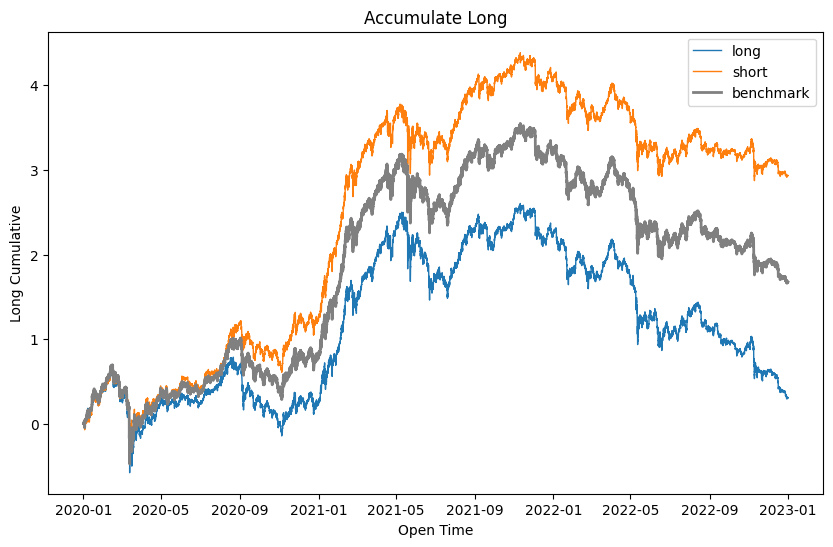

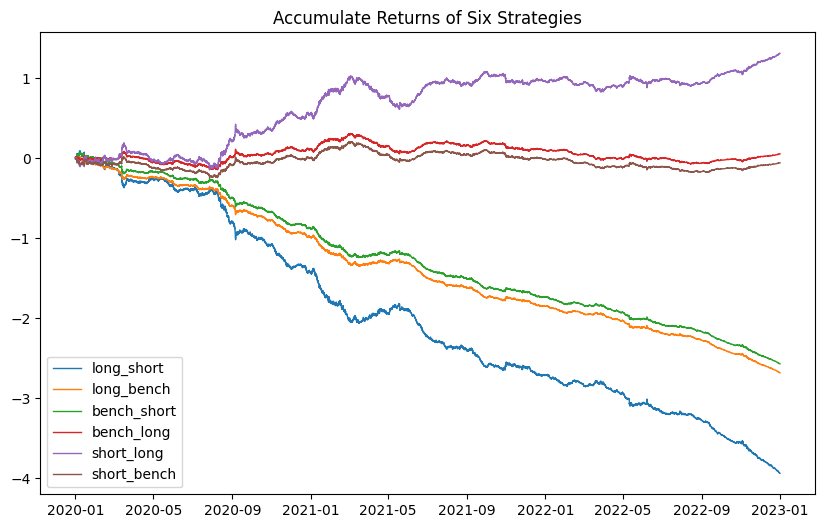

long: 
ann_return = 0.102  sharpe = 0.0931  maxdd = 0.7402  calmar_ratio = 0.1377  

short: 
ann_return = 0.976  sharpe = 0.8909  maxdd = 0.6698  calmar_ratio = 1.4571  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.3121  sharpe = -4.8976  maxdd = 3.6943  calmar_ratio = -0.3552  

long_bench: 
ann_return = -0.8936  sharpe = -6.6024  maxdd = 2.6561  calmar_ratio = -0.3364  

bench_long: 
ann_return = 0.0176  sharpe = 0.1298  maxdd = 0.2902  calmar_ratio = 0.0605  

short_long: 
ann_return = 0.4361  sharpe = 1.6277  maxdd = 0.2772  calmar_ratio = 1.5729  

short_bench: 
ann_return = -0.0195  sharpe = -0.1451  maxdd = 0.3173  calmar_ratio = -0.0615  

bench_short: 
ann_return = -0.8565  sharpe = -6.3752  maxdd = 2.4744  calmar_ratio = -0.3462  



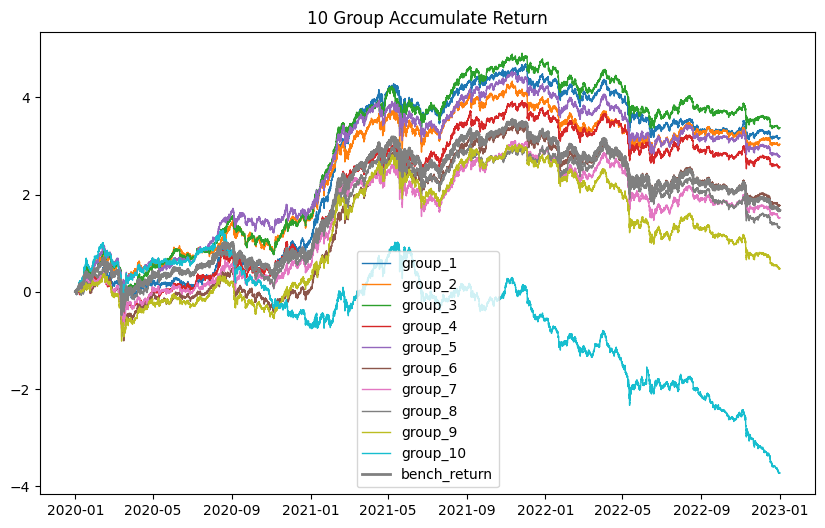

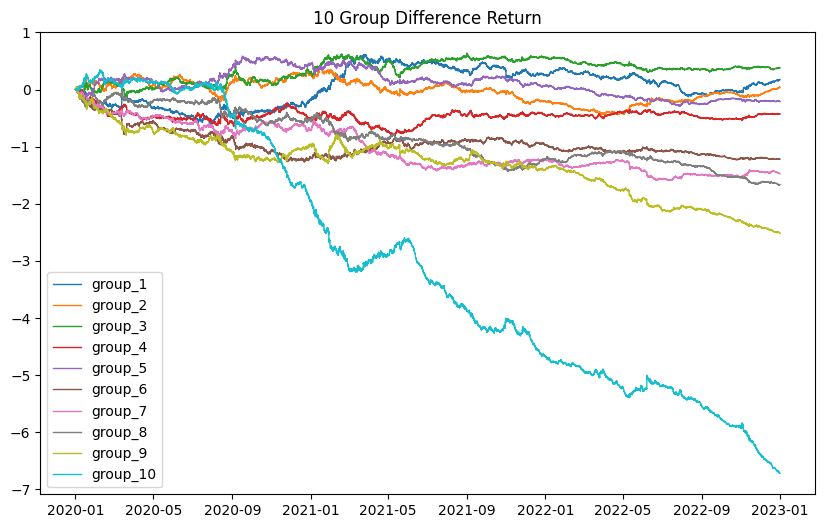

group_1: 
ann_return = 1.0531  sharpe = 0.9246  maxdd = 0.7556  calmar_ratio = 1.3938  

group_2: 
ann_return = 1.0094  sharpe = 0.8783  maxdd = 0.5639  calmar_ratio = 1.79  

group_3: 
ann_return = 1.1222  sharpe = 0.9967  maxdd = 0.6293  calmar_ratio = 1.7834  

group_4: 
ann_return = 0.8535  sharpe = 0.7532  maxdd = 0.8221  calmar_ratio = 1.0383  

group_5: 
ann_return = 0.9256  sharpe = 0.8213  maxdd = 0.6316  calmar_ratio = 1.4655  

group_6: 
ann_return = 0.5902  sharpe = 0.5261  maxdd = 1.0064  calmar_ratio = 0.5864  

group_7: 
ann_return = 0.5051  sharpe = 0.4433  maxdd = 0.8445  calmar_ratio = 0.5982  

group_8: 
ann_return = 0.4416  sharpe = 0.3907  maxdd = 0.6334  calmar_ratio = 0.6972  

group_9: 
ann_return = 0.1578  sharpe = 0.1374  maxdd = 1.0102  calmar_ratio = 0.1562  

group_10: 
ann_return = -1.2418  sharpe = -1.0344  maxdd = 2.2043  calmar_ratio = -0.5634  

-----------------------------------------
group_difference_1: 
ann_return = 0.0576  sharpe = 0.1653  maxdd =

In [3]:
from factor_analysis.factor_analysis import FactorAnalysis

factors = df.select(['open_time', 'symbol', 'taker_buy_quote_volume_ratio'])

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()